In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
airport_city_file = open('训练集\\机场城市对应表.csv')
airport_city = pd.read_csv(airport_city_file)
airport_city_shape = airport_city.shape[0]

weather_file = open('训练集\\2015年5月到2017年5月城市天气.csv', encoding='gbk')
weather = pd.read_csv(weather_file)
weather_shape = weather.shape[0]

emergency_file = open('训练集\\2015年5月到2017年5月特情.csv', encoding='gbk')
emergency = pd.read_csv(emergency_file)
emergency_shape = emergency.shape[0]

data_file = open('训练集\\2015年5月到2017年5月航班动态数据.csv', encoding='gbk')
data = pd.read_csv(data_file)
data_shape = data.shape[0]

C:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


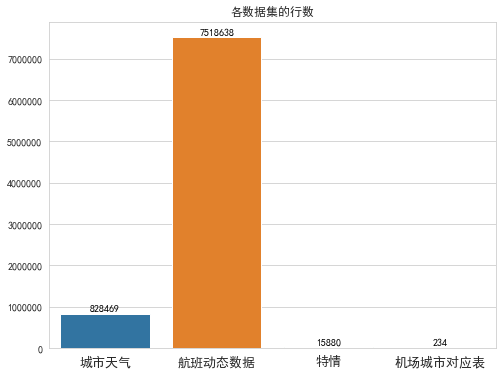

In [3]:
shape_list = np.array([weather_shape, data_shape, emergency_shape, airport_city_shape])
df_name_list = np.array(['城市天气', '航班动态数据', '特情', '机场城市对应表'])

fig, ax = plt.subplots(figsize=(8, 6))
g = sns.barplot(df_name_list, shape_list)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
for i in range(len(shape_list)):
    g.text(i, shape_list[i] + 50000, shape_list[i], color='black', ha='center')
plt.title('各数据集的行数')
plt.show()
fig.savefig('各数据集的行数.pdf')

In [4]:
airport_city = airport_city.dropna()
airport_city_dict = {}
airport = airport_city['机场编码'].values
city = airport_city['城市名称'].values
for i in range(airport_city.shape[0]):
    airport_city_dict[airport[i]] = city[i] 

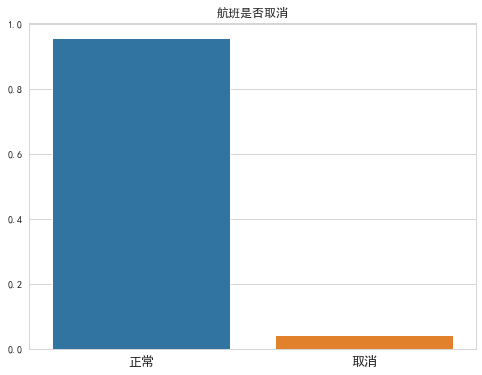

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
delect_dist = data['航班是否取消'].value_counts()
sns.barplot(delect_dist.index, delect_dist.values / sum(delect_dist.values))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
plt.title('航班是否取消')
plt.show()
fig.savefig('航班是否取消.pdf')

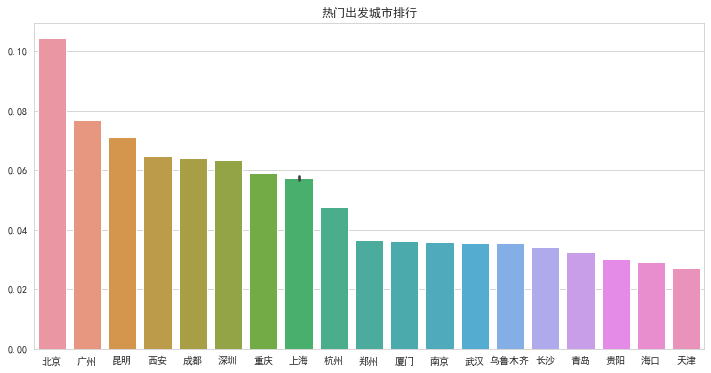

In [6]:
plt.figure(figsize=(12, 6))
start_airport_dist = data['出发机场'].value_counts()[:20]
start_airport_city = [airport_city_dict[it] for it in start_airport_dist.index]
sns.barplot(start_airport_city, start_airport_dist.values / sum(start_airport_dist.values))
plt.title('热门出发城市排行')
plt.show()

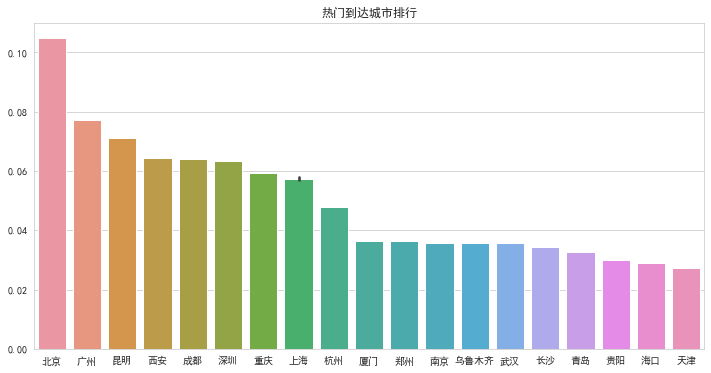

In [7]:
plt.figure(figsize=(12, 6))
station_airport_dist = data['到达机场'].value_counts()[:20]
station_airport_city = [airport_city_dict[it] for it in station_airport_dist.index]
sns.barplot(station_airport_city, station_airport_dist.values / sum(station_airport_dist.values))
plt.title('热门到达城市排行')
plt.show()

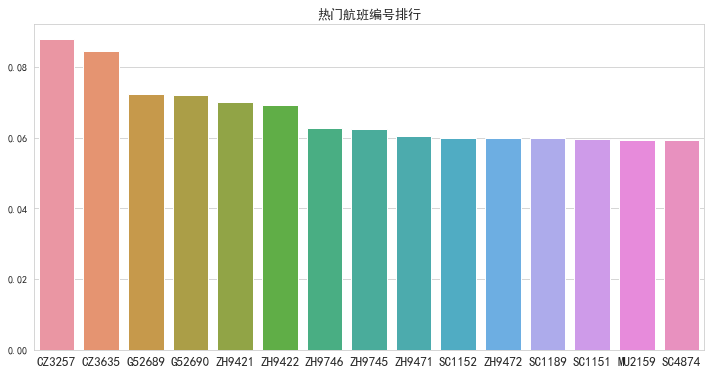

In [8]:
fig, ax = plt.subplots(figsize=(12, 6))
flight_dist = data['航班编号'].value_counts()[:15]
sns.barplot(flight_dist.index, flight_dist.values / sum(flight_dist.values))
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
plt.title('热门航班编号排行',fontsize = 13)
plt.show()

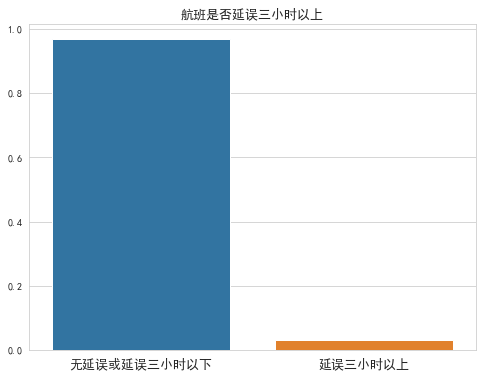

In [9]:
data = data.drop(data.index[data['航班是否取消'] == '取消'], axis=0)
data['y'] = (data['实际起飞时间'] - data['计划起飞时间']) > 3 * 60 * 60
data['延误时长'] = (data['实际起飞时间'] - data['计划起飞时间']) / (60 * 60)

fig, ax = plt.subplots(figsize=(8, 6))
y_dist = data['y'].value_counts()
sns.barplot(y_dist.index, y_dist.values / sum(y_dist.values))
ax.set_xticklabels(['无延误或延误三小时以下','延误三小时以上'])
ax.set_xticklabels(ax.get_xticklabels(), fontsize=13)
plt.title('航班是否延误三小时以上', fontsize=13)
plt.show()
fig.savefig('航班是否延误三小时以上.pdf')

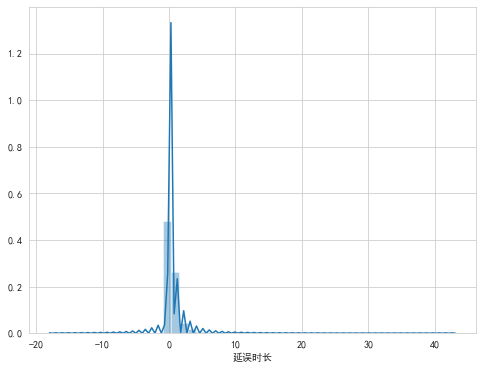

In [10]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.distplot(data['延误时长'].dropna())
plt.show()

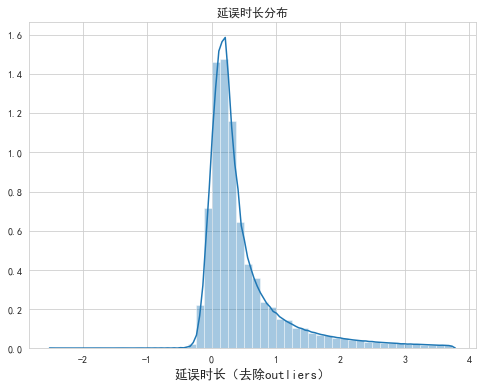

In [11]:
fig, ax = plt.subplots(figsize=(8, 6))
truncated_data = data['延误时长'].dropna()
truncated_data_mean = np.mean(truncated_data)
truncated_data_std = np.std(truncated_data)
bound_rate = 3

truncated_data_index_1 = truncated_data_mean - truncated_data_std * bound_rate <= truncated_data 
truncated_data_index_2 = truncated_data <= truncated_data_mean + truncated_data_std * bound_rate

truncated_data = truncated_data[truncated_data_index_1][truncated_data_index_2]
sns.distplot(truncated_data)
plt.xlabel('延误时长（去除outliers）', fontsize=13)
plt.title('延误时长分布')
plt.show()

fig.savefig('延误时长分布.pdf')

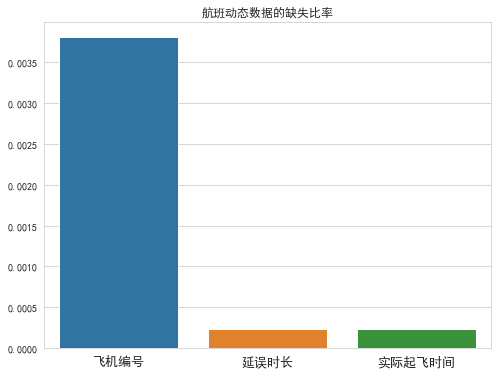

In [13]:
data_na = (data.isnull().sum() / len(data))
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na})

fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(missing_data.index, missing_data.values.flatten())
ax.set_xticklabels(ax.get_xticklabels(),fontsize = 13)
plt.title('航班动态数据的缺失比率')
plt.show()

fig.savefig('航班动态数据的缺失比率.pdf')

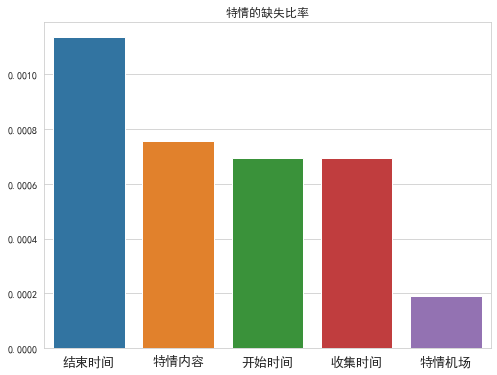

In [14]:
emergency_na = (emergency.isnull().sum() / len(emergency))
emergency_na = emergency_na.drop(emergency_na[emergency_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ratio' :emergency_na})

fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(missing_data.index, missing_data.values.flatten())
ax.set_xticklabels(ax.get_xticklabels(),fontsize = 13)
plt.title('特情的缺失比率')
plt.show()

fig.savefig('特情的缺失比率.pdf')

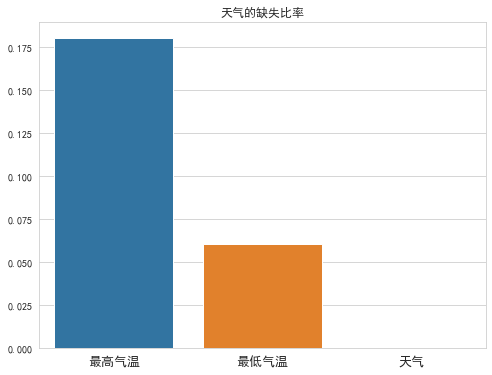

In [15]:
weather_na = (weather.isnull().sum() / len(weather))
weather_na = weather_na.drop(weather_na[weather_na == 0].index).sort_values(ascending = False)
missing_data = pd.DataFrame({'Missing Ratio' :weather_na})

fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(missing_data.index, missing_data.values.flatten())
ax.set_xticklabels(ax.get_xticklabels(),fontsize = 13)
plt.title('天气的缺失比率')
plt.show()

fig.savefig('天气的缺失比率.pdf')